# MLP-TF

In [1]:
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from matplotlib import pyplot
from sklearn.datasets import make_blobs

In [2]:
X, y = make_blobs(
    n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2
)
y = to_categorical(y)

In [3]:
y

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.]], dtype=float32)

In [4]:
n_train = 800

train_X, test_X = X[:n_train, :], X[n_train:, :]

train_y, test_y = y[:n_train], y[n_train:]

print(train_X.shape, test_X.shape)

(800, 2) (200, 2)


In [5]:
model = Sequential(
    [
        Dense(25, input_dim=2, activation="relu"),
        Dense(3, activation="softmax"),
    ]
)
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

Metal device set to: Apple M1 Max
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                75        
                                                                 
 dense_1 (Dense)             (None, 3)                 78        
                                                                 
Total params: 153
Trainable params: 153
Non-trainable params: 0
_________________________________________________________________


2022-12-06 21:43:00.223130: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-12-06 21:43:00.223267: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [6]:
history = model.fit(
    train_X, train_y, validation_data=(test_X, test_y), epochs=100, verbose=1
)

Epoch 1/100


2022-12-06 21:43:00.351556: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-12-06 21:43:00.503076: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


25/25 [==============================] - 1s 15ms/step - loss: 0.8259 - accuracy: 0.5662 - val_loss: 0.7468 - val_accuracy: 0.6850
Epoch 2/100
14/25 [===============>..............] - ETA: 0s - loss: 0.7809 - accuracy: 0.6451

2022-12-06 21:43:00.864060: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


25/25 [==============================] - 0s 11ms/step - loss: 0.7690 - accuracy: 0.6413 - val_loss: 0.6919 - val_accuracy: 0.7050
Epoch 3/100
25/25 [==============================] - 0s 10ms/step - loss: 0.7313 - accuracy: 0.6662 - val_loss: 0.6549 - val_accuracy: 0.7350
Epoch 4/100
25/25 [==============================] - 0s 12ms/step - loss: 0.7021 - accuracy: 0.6762 - val_loss: 0.6274 - val_accuracy: 0.7400
Epoch 5/100
25/25 [==============================] - 0s 10ms/step - loss: 0.6820 - accuracy: 0.6950 - val_loss: 0.6054 - val_accuracy: 0.7450
Epoch 6/100
25/25 [==============================] - 0s 11ms/step - loss: 0.6610 - accuracy: 0.7037 - val_loss: 0.5881 - val_accuracy: 0.7450
Epoch 7/100
25/25 [==============================] - 0s 10ms/step - loss: 0.6445 - accuracy: 0.7138 - val_loss: 0.5738 - val_accuracy: 0.7550
Epoch 8/100
25/25 [==============================] - 0s 10ms/step - loss: 0.6305 - accuracy: 0.7163 - val_loss: 0.5604 - val_accuracy: 0.7600
Epoch 9/100
25/25 

In [7]:
_, train_acc = model.evaluate(train_X, train_y)
_, test_acc = model.evaluate(test_X, test_y)
print("Train: %.3f, Test: %.3f" % (train_acc, test_acc))

7/7 [==============================] - 0s 9ms/step - loss: 0.3653 - accuracy: 0.8400
Train: 0.831, Test: 0.840


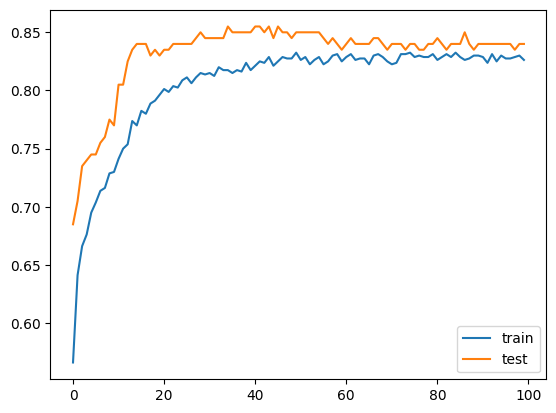

In [8]:
pyplot.plot(history.history["accuracy"], label="train")
pyplot.plot(history.history["val_accuracy"], label="test")
pyplot.legend()
pyplot.show()